In [2]:
# 기본
import pandas as pd
import numpy as np
from pandas import DataFrame 
import math

# 폰트 크기 및 글씨체
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib import font_manager, rc
font_name= font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)
import seaborn as sns
plt.rcParams['figure.figsize']=[10,8]

%matplotlib inline

#시각화 라이브러리
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

In [3]:
df=pd.read_csv('C:/Users/wnrrh/Desktop/data/좌표및버스대수.csv',header=0,encoding='cp949')
df = df[['정류장명','정류장수','버스수','위도','경도','합계','밀집도']]
df.columns = ['정류장명','정류장수','버스수','위도','경도','총 승객수','밀집도']
df

,정류장명,정류장수,버스수,위도,경도,총 승객수,밀집도
0,구로디지털단지역환승센터,2,12,37.484603,126.902026,2142044,0.595012
1,지하철2호선강남역,2,59,37.501183,127.026073,2130673,0.591854
2,고속터미널,3,49,37.505674,127.004968,2656679,0.491978
3,쌍문역,3,37,37.647936,127.034362,2253876,0.313038
4,수유역.강북구청,4,32,37.637874,127.025604,2078915,0.288738
5,미아사거리역,6,46,37.613606,127.030225,3051233,0.282522
6,구로디지털단지역,6,40,37.483882,126.901889,2271604,0.210334
7,노량진역,6,52,37.513738,126.943047,2090038,0.193522
8,홍대입구역,7,85,37.556959,126.923627,2406614,0.191001
9,신도림역,7,65,37.509182,126.890198,2284630,0.097634


In [4]:
df = df.assign(정류장별버스대수 = lambda x: (x["버스수"]) / (x["정류장수"]))
df

,정류장명,정류장수,버스수,위도,경도,총 승객수,밀집도,정류장별버스대수
0,구로디지털단지역환승센터,2,12,37.484603,126.902026,2142044,0.595012,6.000000
1,지하철2호선강남역,2,59,37.501183,127.026073,2130673,0.591854,29.500000
2,고속터미널,3,49,37.505674,127.004968,2656679,0.491978,16.333333
3,쌍문역,3,37,37.647936,127.034362,2253876,0.313038,12.333333
4,수유역.강북구청,4,32,37.637874,127.025604,2078915,0.288738,8.000000
5,미아사거리역,6,46,37.613606,127.030225,3051233,0.282522,7.666667
6,구로디지털단지역,6,40,37.483882,126.901889,2271604,0.210334,6.666667
7,노량진역,6,52,37.513738,126.943047,2090038,0.193522,8.666667
8,홍대입구역,7,85,37.556959,126.923627,2406614,0.191001,12.142857
9,신도림역,7,65,37.509182,126.890198,2284630,0.097634,9.285714


C:\Users\wnrrh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '밀집도 분포')

C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wnrrh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


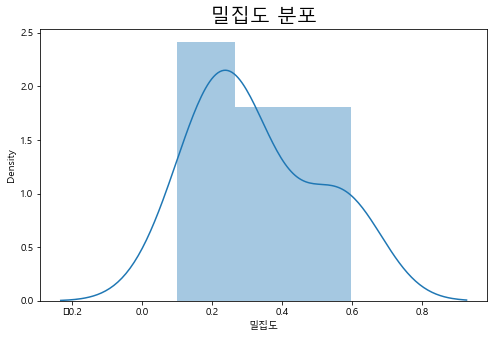

In [5]:
# 밀집도분포
plt.figure(figsize=(8,5))
sns.distplot(df['밀집도'])
plt.title("밀집도 분포",fontdict={'fontsize':20})

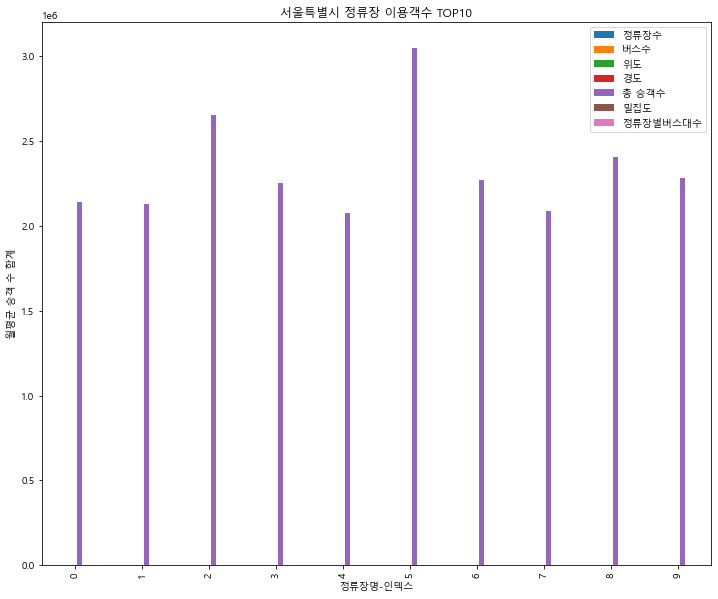

In [6]:
# 이용객 수 도표화
df.plot(kind='bar',figsize=(12,10))
plt.title("서울특별시 정류장 이용객수 TOP10")
plt.ylabel("월평균 승객 수 합계")
plt.xlabel("정류장명-인덱스")
plt.show() 

In [7]:
df위치=df[['정류장명','밀집도','위도','경도']]
df위치

,정류장명,밀집도,위도,경도
0,구로디지털단지역환승센터,0.595012,37.484603,126.902026
1,지하철2호선강남역,0.591854,37.501183,127.026073
2,고속터미널,0.491978,37.505674,127.004968
3,쌍문역,0.313038,37.647936,127.034362
4,수유역.강북구청,0.288738,37.637874,127.025604
5,미아사거리역,0.282522,37.613606,127.030225
6,구로디지털단지역,0.210334,37.483882,126.901889
7,노량진역,0.193522,37.513738,126.943047
8,홍대입구역,0.191001,37.556959,126.923627
9,신도림역,0.097634,37.509182,126.890198


In [8]:
# 시작위치는 top10 의 평균 위치
map_osm = folium.Map(location=[37.54546377,126.9682],zoom_start=11)

In [9]:
for i in df위치.index:
    lat=df위치.loc[i,'위도']
    long=df위치.loc[i,'경도']
    folium.CircleMarker([lat,long],
                       radius=df위치.loc[i,'밀집도']*35,
                       popup=df위치.loc[i,'정류장명'],
                       color='red',
                       fill=True).add_to(map_osm)
map_osm

In [9]:
## 월별 top10 이용객수 변화량
df02 = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/2월.csv',header=0,encoding='cp949')
df03 = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/3월.csv',header=0,encoding='cp949')
df04 = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/4월.csv',header=0,encoding='cp949')
df05 = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/5월.csv',header=0,encoding='cp949')
df06 = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/6월.csv',header=0,encoding='cp949')
df07 = pd.read_csv('C:/Users/wnrrh/Desktop/data/승하차인원정보/7월.csv',header=0,encoding='cp949')

C:\Users\wnrrh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
columns = ["사용년월", "노선번호", "노선명", "표준버스정류장ID", "버스정류장ARS번호", "정류장명", "0시승차", "0시하차", "1시승차", "1시하차", "2시승차", "2시하차", 
"3시승차", "3시하차", "4시승차", "4시하차", "5시승차", "5시하차", "6시승차", "6시하차", "7시승차", "7시하차", "8시승차", "8시하차", 
"9시승차", "9시하차", "10시승차", "10시하차", "11시승차", "11시하차", "12시승차", "12시하차", "13시승차", "13시하차", "14시승차", "14시하차", 
"15시승차", "15시하차", "16시승차", "16시하차", "17시승차", "17시하차", "18시승차", "18시하차", "19시승차", "19시하차", "20시승차", "20시하차", 
"21시승차", "21시하차", "22시승차", "22시하차", "23시승차", "23시하차", "등록일자"]
df02.columns = columns
df03.columns = columns
df04.columns = columns
df05.columns = columns
df06.columns = columns
df07.columns = columns

In [11]:
df02.drop(["사용년월", "노선번호", "노선명", "표준버스정류장ID","버스정류장ARS번호", "0시하차", "1시하차", "2시하차","3시하차",
"4시하차", "5시하차", "6시하차", "7시하차", "8시하차","9시하차", "10시하차", "11시하차", "12시하차", "13시하차", "14시하차",
"15시하차", "16시하차", "17시하차", "18시하차", "19시하차", "20시하차", "21시하차", "22시하차", "23시하차", "등록일자"],
axis = 1, inplace=True)
df03.drop(["사용년월", "노선번호", "노선명", "표준버스정류장ID","버스정류장ARS번호", "0시하차", "1시하차", "2시하차","3시하차",
"4시하차", "5시하차", "6시하차", "7시하차", "8시하차","9시하차", "10시하차", "11시하차", "12시하차", "13시하차", "14시하차",
"15시하차", "16시하차", "17시하차", "18시하차", "19시하차", "20시하차", "21시하차", "22시하차", "23시하차", "등록일자"],
axis = 1, inplace=True)
df04.drop(["사용년월", "노선번호", "노선명", "표준버스정류장ID","버스정류장ARS번호", "0시하차", "1시하차", "2시하차","3시하차",
"4시하차", "5시하차", "6시하차", "7시하차", "8시하차","9시하차", "10시하차", "11시하차", "12시하차", "13시하차", "14시하차",
"15시하차", "16시하차", "17시하차", "18시하차", "19시하차", "20시하차", "21시하차", "22시하차", "23시하차", "등록일자"],
axis = 1, inplace=True)
df05.drop(["사용년월", "노선번호", "노선명", "표준버스정류장ID","버스정류장ARS번호", "0시하차", "1시하차", "2시하차","3시하차",
"4시하차", "5시하차", "6시하차", "7시하차", "8시하차","9시하차", "10시하차", "11시하차", "12시하차", "13시하차", "14시하차",
"15시하차", "16시하차", "17시하차", "18시하차", "19시하차", "20시하차", "21시하차", "22시하차", "23시하차", "등록일자"],
axis = 1, inplace=True)
df06.drop(["사용년월", "노선번호", "노선명", "표준버스정류장ID","버스정류장ARS번호", "0시하차", "1시하차", "2시하차","3시하차",
"4시하차", "5시하차", "6시하차", "7시하차", "8시하차","9시하차", "10시하차", "11시하차", "12시하차", "13시하차", "14시하차",
"15시하차", "16시하차", "17시하차", "18시하차", "19시하차", "20시하차", "21시하차", "22시하차", "23시하차", "등록일자"],
axis = 1, inplace=True)
df07.drop(["사용년월", "노선번호", "노선명", "표준버스정류장ID","버스정류장ARS번호", "0시하차", "1시하차", "2시하차","3시하차",
"4시하차", "5시하차", "6시하차", "7시하차", "8시하차","9시하차", "10시하차", "11시하차", "12시하차", "13시하차", "14시하차",
"15시하차", "16시하차", "17시하차", "18시하차", "19시하차", "20시하차", "21시하차", "22시하차", "23시하차", "등록일자"],
axis = 1, inplace=True)

In [12]:
df02 = df02.assign(합계 = lambda x: (x["0시승차"] + x["1시승차"] + x["2시승차"] + x["3시승차"] + x["4시승차"] + x["5시승차"] + 
x["6시승차"] + x["7시승차"] + x["8시승차"] + x["9시승차"] + x["10시승차"] + x["11시승차"] + x["12시승차"] + x["13시승차"] + x["14시승차"] + 
x["15시승차"] + x["16시승차"] + x["17시승차"] + x["18시승차"] + x["19시승차"] + x["20시승차"] + x["21시승차"] + x["22시승차"] + x["23시승차"]))
df03 = df03.assign(합계 = lambda x: (x["0시승차"] + x["1시승차"] + x["2시승차"] + x["3시승차"] + x["4시승차"] + x["5시승차"] + 
x["6시승차"] + x["7시승차"] + x["8시승차"] + x["9시승차"] + x["10시승차"] + x["11시승차"] + x["12시승차"] + x["13시승차"] + x["14시승차"] + 
x["15시승차"] + x["16시승차"] + x["17시승차"] + x["18시승차"] + x["19시승차"] + x["20시승차"] + x["21시승차"] + x["22시승차"] + x["23시승차"]))
df04 = df04.assign(합계 = lambda x: (x["0시승차"] + x["1시승차"] + x["2시승차"] + x["3시승차"] + x["4시승차"] + x["5시승차"] + 
x["6시승차"] + x["7시승차"] + x["8시승차"] + x["9시승차"] + x["10시승차"] + x["11시승차"] + x["12시승차"] + x["13시승차"] + x["14시승차"] + 
x["15시승차"] + x["16시승차"] + x["17시승차"] + x["18시승차"] + x["19시승차"] + x["20시승차"] + x["21시승차"] + x["22시승차"] + x["23시승차"]))
df05 = df05.assign(합계 = lambda x: (x["0시승차"] + x["1시승차"] + x["2시승차"] + x["3시승차"] + x["4시승차"] + x["5시승차"] + 
x["6시승차"] + x["7시승차"] + x["8시승차"] + x["9시승차"] + x["10시승차"] + x["11시승차"] + x["12시승차"] + x["13시승차"] + x["14시승차"] + 
x["15시승차"] + x["16시승차"] + x["17시승차"] + x["18시승차"] + x["19시승차"] + x["20시승차"] + x["21시승차"] + x["22시승차"] + x["23시승차"]))
df06 = df06.assign(합계 = lambda x: (x["0시승차"] + x["1시승차"] + x["2시승차"] + x["3시승차"] + x["4시승차"] + x["5시승차"] + 
x["6시승차"] + x["7시승차"] + x["8시승차"] + x["9시승차"] + x["10시승차"] + x["11시승차"] + x["12시승차"] + x["13시승차"] + x["14시승차"] + 
x["15시승차"] + x["16시승차"] + x["17시승차"] + x["18시승차"] + x["19시승차"] + x["20시승차"] + x["21시승차"] + x["22시승차"] + x["23시승차"]))
df07 = df07.assign(합계 = lambda x: (x["0시승차"] + x["1시승차"] + x["2시승차"] + x["3시승차"] + x["4시승차"] + x["5시승차"] + 
x["6시승차"] + x["7시승차"] + x["8시승차"] + x["9시승차"] + x["10시승차"] + x["11시승차"] + x["12시승차"] + x["13시승차"] + x["14시승차"] + 
x["15시승차"] + x["16시승차"] + x["17시승차"] + x["18시승차"] + x["19시승차"] + x["20시승차"] + x["21시승차"] + x["22시승차"] + x["23시승차"]))

In [13]:
df02 = df02.sort_values(by = "합계", ascending=False)
df02 = df02.groupby(["정류장명"]).sum()
df03 = df03.sort_values(by = "합계", ascending=False)
df03 = df03.groupby(["정류장명"]).sum()
df04 = df04.sort_values(by = "합계", ascending=False)
df04 = df04.groupby(["정류장명"]).sum()
df05 = df05.sort_values(by = "합계", ascending=False)
df05 = df05.groupby(["정류장명"]).sum()
df06 = df06.sort_values(by = "합계", ascending=False)
df06 = df06.groupby(["정류장명"]).sum()
df07 = df07.sort_values(by = "합계", ascending=False)
df07 = df07.groupby(["정류장명"]).sum()

In [14]:
## 월별로 얼마나 이용했는지 파악하기. 
df02=df02.sort_values(by="합계",ascending=False)
df02=df02.head(10)
df03=df03.sort_values(by="합계",ascending=False)
df03=df03.head(10)
df04=df04.sort_values(by="합계",ascending=False)
df04=df04.head(20)
df05=df05.sort_values(by="합계",ascending=False)
df05=df05.head(10)
df06=df06.sort_values(by="합계",ascending=False)
df06=df06.head(10)
df07=df07.sort_values(by="합계",ascending=False)
df07=df07.head(10)


In [15]:
df승객=pd.read_csv('C:/Users/wnrrh/Desktop/data/월별밀집도.csv',header=0,encoding='cp949')

In [16]:
# 미아사거리 고터 홍대 신도림 구로단지역 쌍문 노량진 구로환승센터 강남 수유강북구청
df승객 = df승객.head(10)

df승객

,정류장,February,March,April,May,June,July
0,미아사거리역,4175.731481,4908.361111,4835.740741,4847.435185,4906.972222,4577.916667
1,고속터미널,7185.314815,8612.722222,8529.240741,8527.981481,8677.666667,7664.833333
2,홍대입구역,3158.984127,3438.007937,2146.134921,3508.079365,3617.341270,3231.563492
3,신도림역,2640.968254,3176.904762,3049.785714,3084.587302,3204.103175,2975.634921
4,구로디지털단지역,3135.638889,3788.046296,3483.537037,3517.490741,3652.259259,3456.398148
5,쌍문역,6158.037037,7337.462963,7173.037037,6996.833333,7252.685185,6820.388889
6,노량진역,2773.685185,3458.500000,3150.027778,3352.768519,3399.638889,3217.583333
7,구로디지털단지역환승센터,8610.277778,10488.916670,10288.861110,10007.833330,10462.222220,9643.111111
8,지하철2호선강남역,8570.527778,10392.194440,10046.388890,10086.611110,10500.666670,9588.972222
9,수유역.강북구청,4259.527778,5054.250000,4966.388889,4851.666667,4960.277778,4781.708333


In [17]:
# heatmap by plt.pcolor()

df승객.style.background_gradient(cmap='summer')

,정류장,February,March,April,May,June,July
0,미아사거리역,4175.731481,4908.361111,4835.740741,4847.435185,4906.972222,4577.916667
1,고속터미널,7185.314815,8612.722222,8529.240741,8527.981481,8677.666667,7664.833333
2,홍대입구역,3158.984127,3438.007937,2146.134921,3508.079365,3617.341270,3231.563492
3,신도림역,2640.968254,3176.904762,3049.785714,3084.587302,3204.103175,2975.634921
4,구로디지털단지역,3135.638889,3788.046296,3483.537037,3517.490741,3652.259259,3456.398148
5,쌍문역,6158.037037,7337.462963,7173.037037,6996.833333,7252.685185,6820.388889
6,노량진역,2773.685185,3458.500000,3150.027778,3352.768519,3399.638889,3217.583333
7,구로디지털단지역환승센터,8610.277778,10488.916670,10288.861110,10007.833330,10462.222220,9643.111111
8,지하철2호선강남역,8570.527778,10392.194440,10046.388890,10086.611110,10500.666670,9588.972222
9,수유역.강북구청,4259.527778,5054.250000,4966.388889,4851.666667,4960.277778,4781.708333


In [20]:
del df승객['정류장']

<function matplotlib.pyplot.show(close=None, block=None)>

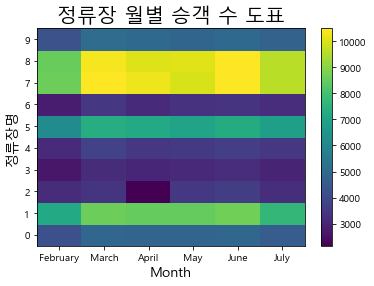

In [21]:
# 정류장명 (y축 인덱스는) 위에 표 참고. 
plt.pcolor(df승객)
plt.yticks(np.arange(0.5, len(df승객.index), 1), df승객.index)
plt.xticks(np.arange(0.5, len(df승객.columns), 1), df승객.columns)
plt.title('정류장 월별 승객 수 도표',fontsize=20)
plt.xlabel('Month',fontsize=14)
plt.ylabel('정류장명',fontsize=14)
plt.colorbar()
plt.show